# PROBLEM STATEMENT



Today, precision agriculture-that is, an advanced and modern approach to farming involving elaborate data on soil characteristics, weather conditions, and crop yields-this system aims that farmers make the best choice of crops that will give maximum yield and profitability.

Precision farming is more important because such an approach guides in reducing crop failure and aiding farmers in taking informed decisions. 

With this technology, it has the capacity to play a big role in reducing the historical agrarian crisis by allowing farmers to grow the crops ideally suited to their land conditions, thereby ensuring sustainability and enhancing agricultural productivity.

# GOAL

To train and develop a classification Model under supervised machine learning, that will predict and/or recommend optimum crop to be cultivated by farmers based on several parameters and help them make an informed decision before cultivation.

###### ![Alt Text](systemFlow.png)

# ABOUT THE DATASET

The data set is obtained from Kaggle. The dataset contains essential variables like Nitrogen, Phosphorus, Potassium, pH levels, humidity, temperature, and rainfall, which are all necessary to determine the appropriate crop types to be cultivated. The data has been filtered so that the foremost drivers of crop yield would be highlighted.

In [3]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
#import dataset
crop_df = pd.read_csv("Crop_recommendation.csv")
crop_df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# FEATURES NAMES

N - ratio of Nitrogen content in soil P - ratio of Phosphorous content in soil K - ratio of Potassium content in soil temperature - temperature in degree Celsius humidity - relative humidity in % ph - ph value of the soil rainfall - rainfall in mm.

# EXPLORATORY DATA ANALYSIS (EDA) ⬇️⬇️⬇️

In [5]:
#retrieve the first five rows of that DataFrame
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
#retrieve the last five rows of that DataFrame
crop_df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
#checking the number of entries, the data types of each column, and how many non-null values each column contains
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
#checking number of colums in the df
crop_df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
#retrieve all the labels
crop_df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
#count freq of each label
crop_df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [11]:
# Checking for missing values in the dataset
null_values = crop_df.isnull().sum()
null_values

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [12]:
#checking duplicate rows
chech_duplicacy = crop_df.duplicated().sum()
chech_duplicacy

0

In [13]:
#checking the distribution and variability of the data
descriptive_stats = crop_df.describe()
descriptive_stats

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Interpretation

Nitrogen levels range from 0 to 140, with an average of 50.6, indicating a reasonable spread across samples.

Phosphorus levels vary from 5 to 145, with a mean around 53.4, suggesting diverse soil compositions.

Potassium ranges more widely, from 5 to 205, with an average of 48.1, possibly due to varying soil needs.

Temperatures span from about 8.8 to 43.7°C, with a mean around 25.6°C. This dataset likely includes data from regions with warm climates.

Humidity values range from 14.3% to nearly 100%, with a mean of 71.5%, indicating generally humid conditions.

pH levels vary from 3.5 to nearly 10, with an average of 6.5, suggesting soils from acidic to slightly alkaline.

Rainfall ranges from 20.2 to 298.6 mm, with an average of 103.5 mm, indicating regions with different rainfall patterns.


In [14]:
#degree of association between the variables
correlation_matrix = crop_df.corr(numeric_only=True)
correlation_matrix

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

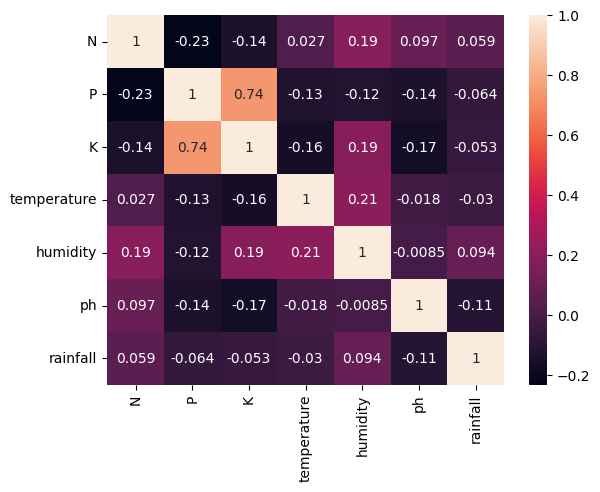

In [15]:
#visual display of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cbar=True)

# Analysis

P and K (Phosphorus and Potassium) have a strong positive correlation of 0.74, indicating that as phosphorus levels increase, potassium levels tend to increase as well.

Humidity and temperature have a positive correlation (0.21), suggesting that higher humidity is somewhat associated with higher temperatures in this dataset.

Most other variables show weak correlations, as most values are close to 0. This suggests that many of the variables are not strongly linearly related to each other.



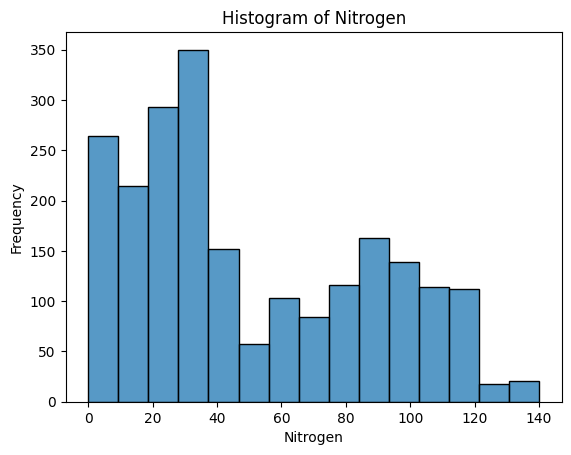

In [16]:
# Shows frequency distribution of continuous variables(Nitrogen).
sns.histplot(crop_df['N'])
plt.title('Histogram of Nitrogen')
plt.xlabel('Nitrogen')
plt.ylabel('Frequency')
plt.show()

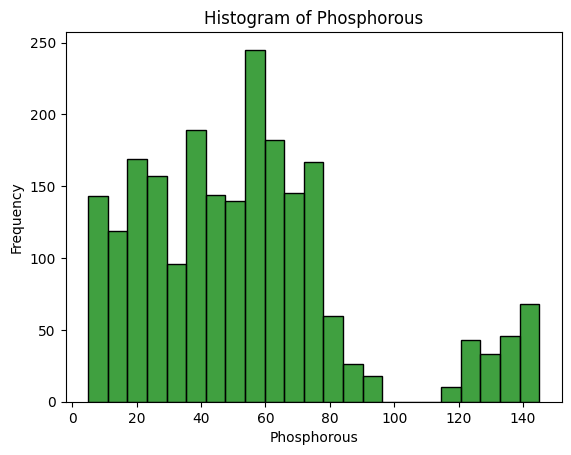

In [17]:
# Shows frequency distribution of continuous variables(Phosphorous).
sns.histplot(crop_df['P'],color='Green')
plt.title('Histogram of Phosphorous')
plt.xlabel('Phosphorous')
plt.ylabel('Frequency')
plt.show()

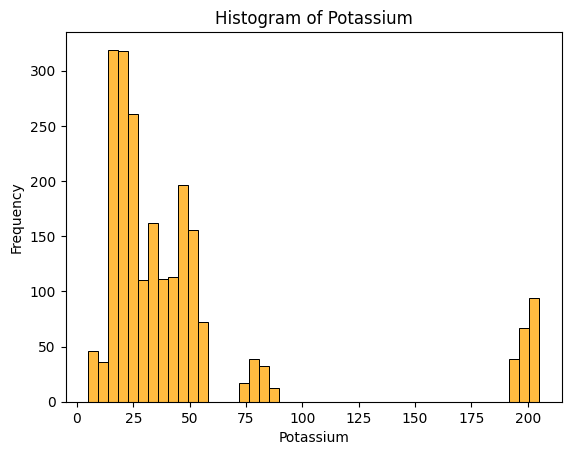

In [18]:
# Shows frequency distribution of continuous variables(Potassium).
sns.histplot(crop_df['K'],color='Orange')
plt.title('Histogram of Potassium')
plt.xlabel('Potassium')
plt.ylabel('Frequency')
plt.show()

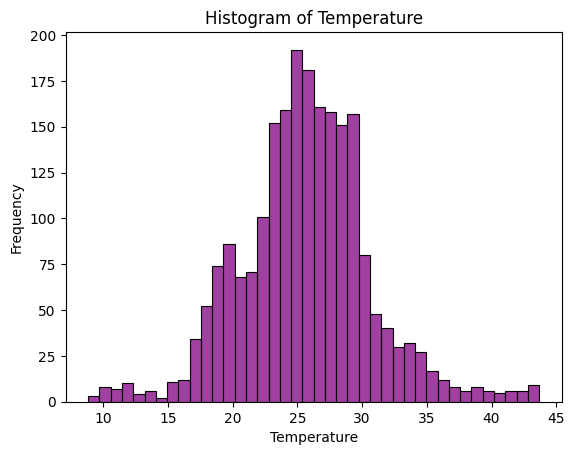

In [19]:
# Shows frequency distribution of continuous variables(Temperature).
sns.histplot(crop_df['temperature'],color='Purple')
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

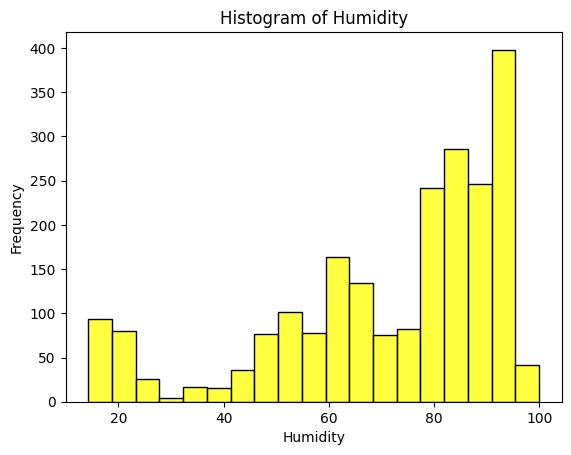

In [20]:
# Shows frequency distribution of continuous variables(Humidity).
sns.histplot(crop_df['humidity'],color='Yellow')
plt.title('Histogram of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

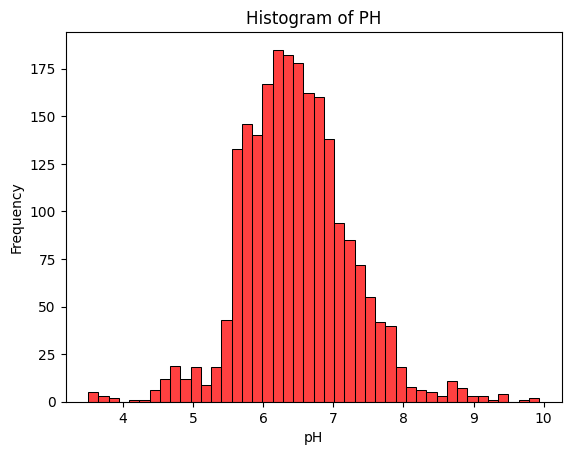

In [21]:
# Shows frequency distribution of continuous variables(pH).
sns.histplot(crop_df['ph'],color='Red')
plt.title('Histogram of PH')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

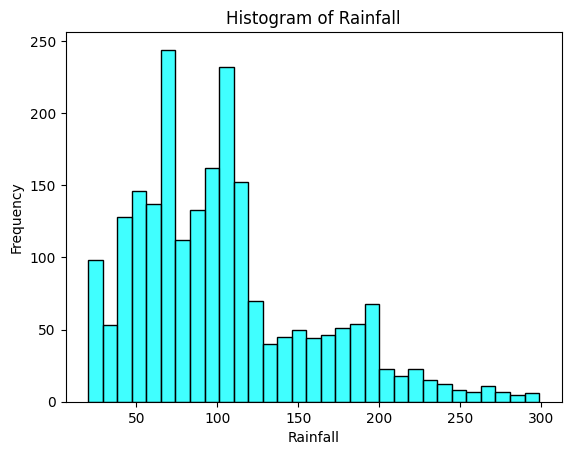

In [22]:
# Shows frequency distribution of continuous variables(Rainfall).
sns.histplot(crop_df['rainfall'],color='Cyan')
plt.title('Histogram of Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()

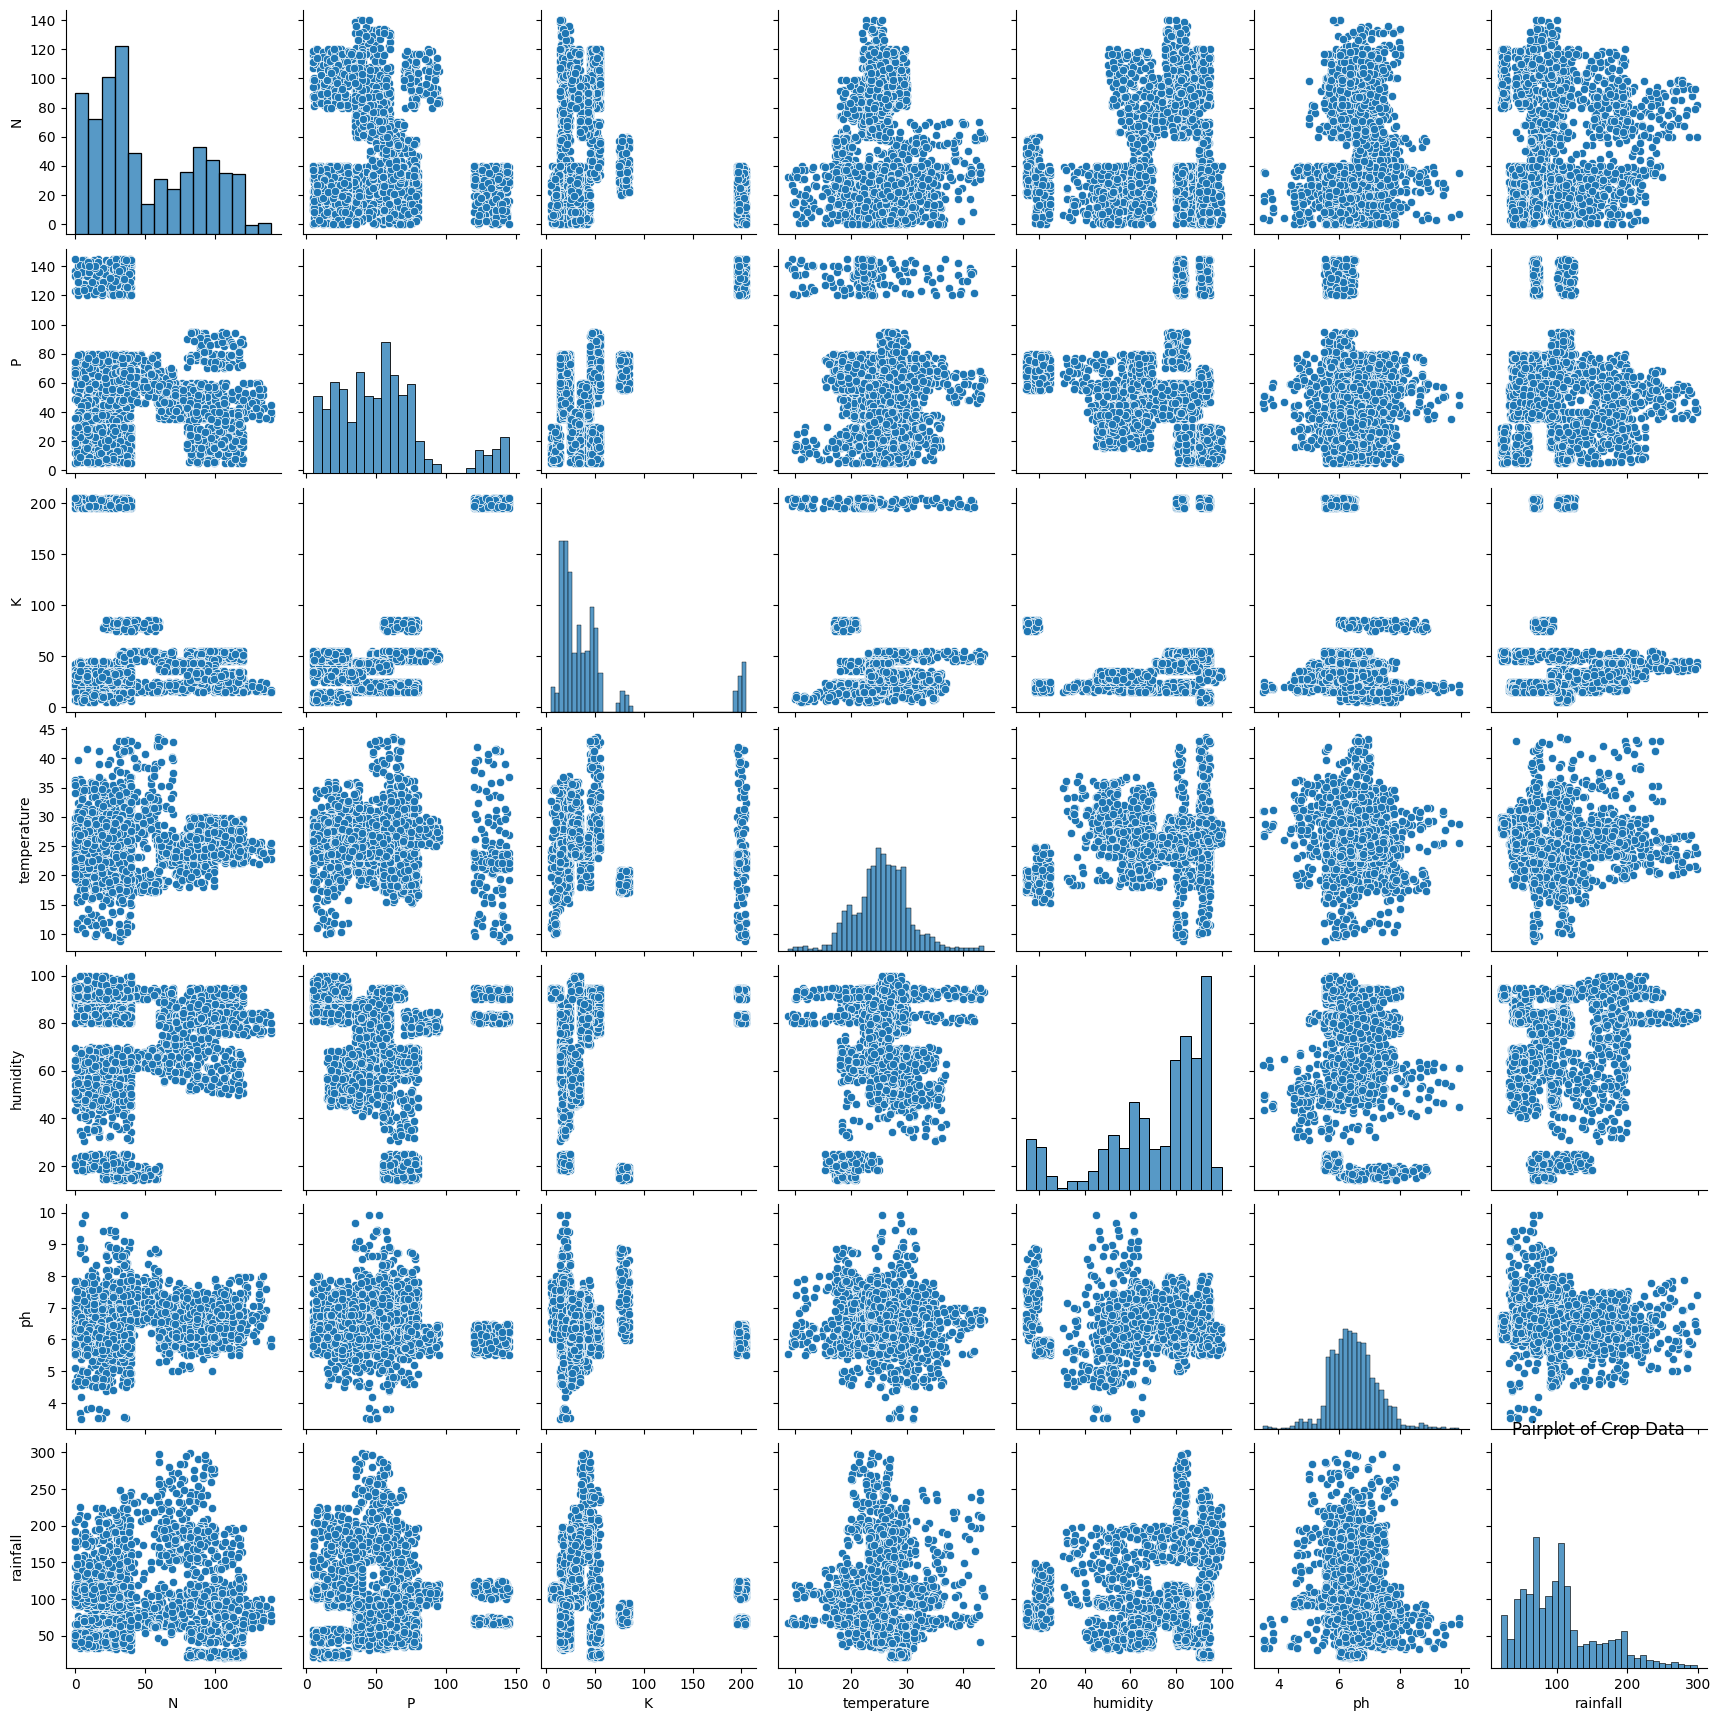

In [23]:
# Displays relationships and distributions between pairs of variables.
sns.pairplot(crop_df)
plt.title('Pairplot of Crop Data')
plt.show()


# Key Observations:

### Histograms on the Diagonal:

Each histogram on the diagonal shows the distribution of individual variables.

N, P, and K: These have somewhat irregular distributions, suggesting discrete clusters of values.

Temperature: Appears more normally distributed, centered around a specific range.

Humidity: Mostly concentrated in higher values, with fewer instances at lower values.

pH: Tightly clustered in the middle range, indicating a narrow pH variation.

Rainfall: Broad distribution with several higher values indicating varied rainfall patterns.

## Scatterplots for Pairwise Relationships: Each scatterplot in the grid shows the relationship between two variables.

N vs. P and N vs. K: These show distinct clusters or bands, which could indicate that nitrogen, phosphorus, and potassium values are often grouped within certain ranges.

Temperature with Other Variables: There doesn’t appear to be a strong correlation between temperature and other features, as the points are widely scattered.

Humidity and pH with Other Variables: Humidity and pH do not show strong linear relationships with most other variables but are spread across different ranges.

## Insights for Data Analysis:

This pair plot allows for quick visual detection of patterns, clusters, and potential correlations among variables, which could be useful for feature selection or further data preprocessing.

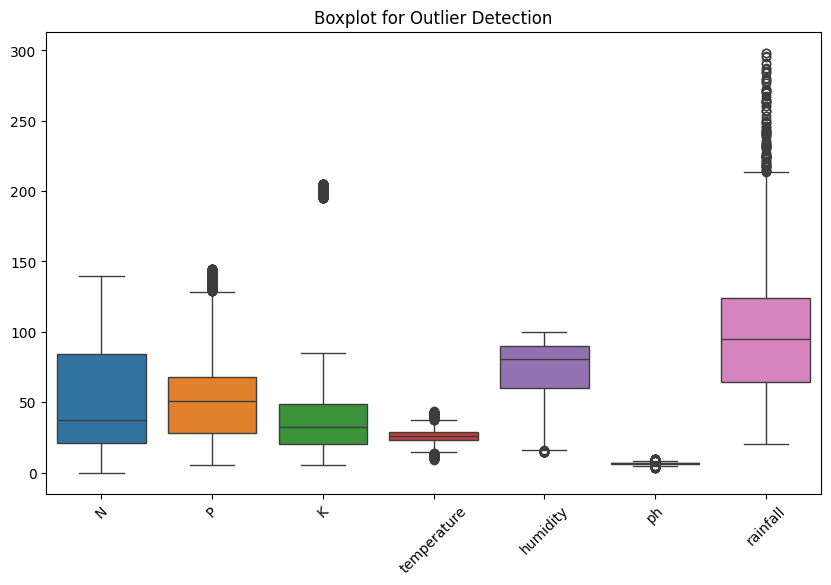

In [24]:
#identifies outliers and variation in data.
plt.figure(figsize=(10, 6))
sns.boxplot(data=crop_df)
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=45)
plt.show()


# Interpretation

Nitrogen (N): The values are fairly spread out, with a large interquartile range (IQR) and some outliers on the higher end.

Phosphorus (P): This has a smaller IQR than nitrogen but a significant number of outliers above the upper whisker, indicating occasional high values.

Potassium (K): The spread is moderate, with some outliers on both ends, showing occasional extreme values.

Temperature: The data points for temperature are closely packed with a small IQR, but there are a few outliers on both ends, indicating mostly consistent values with minor extremes.

Humidity: Humidity has a medium spread and a few outliers, suggesting occasional deviations.

pH: The pH values are tightly clustered with a very narrow IQR, indicating little variability, but a few outliers show occasional extreme pH levels.

Rainfall: Rainfall has a large IQR, indicating a wide range of values, and many outliers on the high end, suggesting that high rainfall is a common extreme in this dataset.

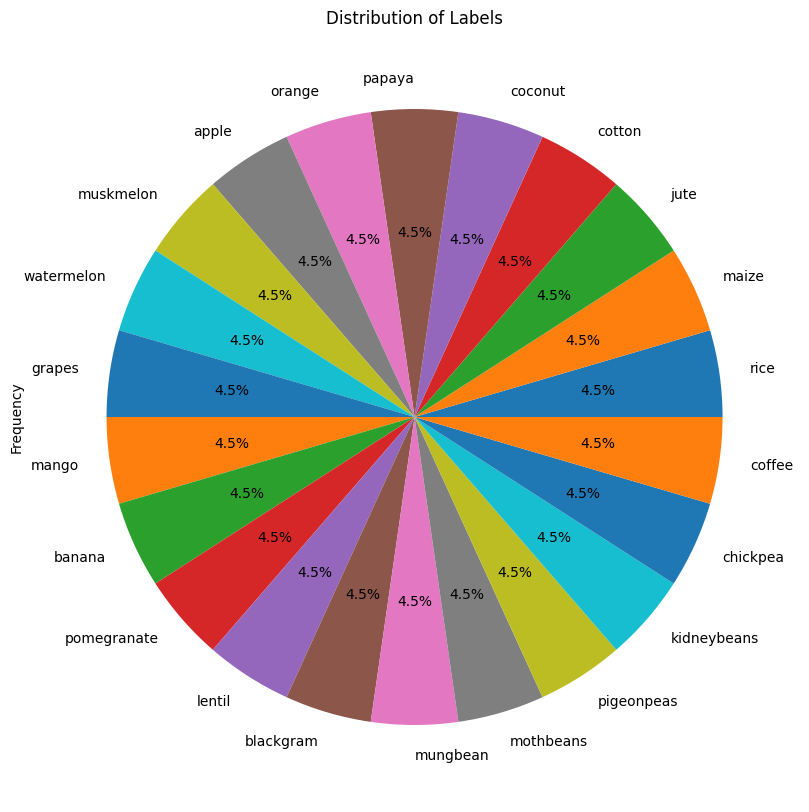

In [25]:
#labels visualization
plt.figure(figsize=(10,10))
crop_df['label'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("Distribution of Labels")
plt.ylabel('Frequency')
plt.show()

# Analysis

Since each segment occupies an equal 4.5% portion, this distribution indicates that all these categories have the same frequency in the dataset, suggesting an evenly balanced dataset across all labels.

In [26]:
crop_df.iloc[:,:-1].skew()

N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64

# Interpretation Summary

Most Influential Factors: Potassium (K), Phosphorus (P), and Nitrogen (N) are the most influential predictors, with potassium being the strongest. These elements likely represent crucial nutrients that drive plant health and crop yields.

Environmental Factors: Temperature and rainfall both positively affect the predicted outcome, but they play a less significant role compared to the nutrients.
Negative Impact: Humidity has a negative impact on the outcome, suggesting that excessive moisture may hinder plant growth or productivity in the context you're modeling.


# TARGET COLUNM: ENCODING

When working with categorical data in machine learning, encoding is essential to convert these categories into numerical format so that algorithms can process them

In [27]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop_df['cropName']=  crop_df['label'].map(crop_dict)

In [28]:
crop_df

,N,P,K,temperature,humidity,ph,rainfall,label,cropName
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [29]:
#we drop the column label since it's nolonger neeeded
crop_df.drop(['label'],axis=1,inplace=True)
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,cropName
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [30]:
crop_df['cropName'].unique()

array([ 1,  2, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3, 22])

# TRAIN TEST SPLIT

it involves dividing the available data into two parts: one for training the model and the other for testing its performance.

In [31]:
X = crop_df.drop(['cropName'],axis=1)
y = crop_df['cropName']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [34]:
X_test

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
59,99,55,35,21.723831,80.238990,6.501698,277.962619
71,67,45,38,22.727910,82.170688,7.300411,260.887506
1908,121,47,16,23.605640,79.295731,7.723240,72.498009
1958,116,52,19,22.942767,75.371706,6.114526,67.080226


In [35]:
#shape of X_train data
X_train.shape

(1760, 7)

In [36]:
#shape of X_test data
X_test.shape

(440, 7)

In [37]:
#shape of y_train data
y_train.shape

(1760,)

In [38]:
#shape of y_test data
y_test.shape

(440,)

# TO SCALE FEATURES USING MINMAXSCALER

This scaler transforms the features to a specified range, typically between 0 and 1, which can help in improving the performance of machine learning models.

In [39]:
#initialise the MinMinScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [40]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [41]:
X_test

array([[0.72142857, 0.08571429, 0.21      , ..., 0.93872187, 0.41682113,
        0.021381  ],
       [0.7       , 0.02142857, 0.23      , ..., 0.84296447, 0.42837304,
        0.10449492],
       [0.42142857, 0.40714286, 0.22      , ..., 0.92264534, 0.5344578 ,
        0.33938901],
       ...,
       [0.86428571, 0.3       , 0.055     , ..., 0.75864563, 0.6560289 ,
        0.18741185],
       [0.82857143, 0.33571429, 0.07      , ..., 0.71286229, 0.40585322,
        0.16793744],
       [0.03571429, 0.45      , 0.075     , ..., 0.21974075, 0.40696371,
        0.48530014]])

# TRAINING THE MODELS

This is a classification problem:

In [42]:
#import classification algorithms from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

#iterate over each model
for name, model in models.items():
    #model training
    model.fit(X_train,y_train)
    #model taining
    ypred = model.predict(X_test)
    
    print(f"{name} with accuracy: {accuracy_score(y_test, ypred) * 100:.2f}%")
    print('classification_report: ')
    print(classification_report(y_test, ypred))
    print("Confusion matrix : \n",confusion_matrix(y_test,ypred))
    print("=============================************=============================")
    

Logistic Regression with accuracy: 91.82%
classification_report: 
              precision    recall  f1-score   support

           1       0.64      0.84      0.73        19
           2       1.00      0.95      0.98        21
           3       0.84      0.70      0.76        23
           4       0.94      1.00      0.97        17
           5       1.00      1.00      1.00        27
           6       1.00      0.74      0.85        23
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        14
          12       0.66      1.00      0.79        19
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        23
          15       0.69      1.00      0.81        11
          16       0.89      0.85      0.87        20
          17   

## The results indicate that the Naive Bayes model has achieved exceptionally high performance, with an accuracy of 99.55%. Additionally, the classification report shows perfect precision, recall, and F1-scores for all classes, suggesting that the model is performing exceedingly well, particularly in terms of classification for each class.

## Key Insights from the Classification Report

#### Precision, Recall, F1-score: All of these metrics are 1.00 (perfect) for most of the classes, indicating that the model is correctly identifying the instances of each class without any false positives or false negatives.

#### Macro and Weighted Averages: The macro avg and weighted avg also show 1.00, which reinforces that the model is consistently performing well across all classes, irrespective of their frequency in the dataset.

#### Support: This indicates the number of instances in each class. The class distribution seems relatively balanced, with each class having a sufficient number of samples (ranging from 11 to 27 samples per class).

In [43]:
#Finally selected the best perform model on the data -- GaussianNB model
GaussianNB_Classification_Model = GaussianNB()
GaussianNB_Classification_Model.fit(X_train,y_train)
ypred = GaussianNB_Classification_Model.predict(X_test)
accuracy_score(y_test,ypred)

0.9954545454545455

# SAVE MODEL

In [44]:
#Import libraries
import json
import pickle
import os

In [47]:
# Save the model
pickle.dump(GaussianNB_Classification_Model, open('GaussianNB_Classification_Model.pkl', 'wb'))
# Save the fitted scaler
pickle.dump(mx, open('MinMaxScaler.pkl', 'wb'))

In [48]:
# Load the saved model
GaussianNB_Classification_Model = pickle.load(open('GaussianNB_Classification_Model.pkl', 'rb'))
# Load the scaler
MinMaxScaler = pickle.load(open('MinMaxScaler.pkl', 'rb'))

# PREDICTIVE SYSTEM

### Function to take input and predict the best crop


In [49]:
def predict(N, P, K, temperature, humidity, ph, rainfall):
    #put extracted features in numpy array
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    # Transform features using the pre-trained scaler
    transformed_features = MinMaxScaler.transform(features)
    #model predict the label
    prediction = GaussianNB_Classification_Model.predict(transformed_features)
    # Return the predicted crop number
    return prediction[0]  


# Crop dictionary mapping
crop_dict = {
    1: 'rice',
    2: 'maize',
    3: 'jute',
    4: 'cotton',
    5: 'coconut',
    6: 'papaya',
    7: 'orange',
    8: 'apple',
    9: 'muskmelon',
    10: 'watermelon',
    11: 'grapes',
    12: 'mango',
    13: 'banana',
    14: 'pomegranate',
    15: 'lentil',
    16: 'blackgram',
    17: 'mungbean',
    18: 'mothbeans',
    19: 'pigeonpeas',
    20: 'kidneybeans',
    21: 'chickpea',
    22: 'coffee'
}


# Testing 

In [50]:
# Example usage
N, P, K, temperature, humidity, ph, rainfall = 101,	17,	47,	29.494014,	94.729813,	6.185053,	26.308209 #label muskmelon
predicted_crop_number = predict(N, P, K, temperature, humidity, ph, rainfall)

# Check if the predicted crop number is in the crop dictionary and print the result
if predicted_crop_number in crop_dict:
    crop = crop_dict[predicted_crop_number]
    print("{} is the best crop to be cultivated.".format(crop))
else:
    print("Sorry, we are not able to recommend a proper crop for this environment.")

muskmelon is the best crop to be cultivated.


******************************************************************** Model trained and Saved *****************************************************************************************************************